In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("data.csv")

In [5]:
data.shape

(569, 33)

In [6]:
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [7]:
data.drop(['Unnamed: 32',"id"],axis = 1, inplace = True)

In [8]:
data.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
data["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
data.shape

(569, 31)

In [11]:
encoder = LabelEncoder()

In [12]:
data["diagnosis"]  = LabelEncoder().fit_transform(data["diagnosis"])

In [13]:
encoder = OneHotEncoder()
en = encoder.fit_transform(data[["diagnosis"]]).toarray()
en = pd.DataFrame(en, columns = ["B","M"])
en.value_counts()

B    M  
1.0  0.0    357
0.0  1.0    212
dtype: int64

In [14]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data["diagnosis"].value_counts()

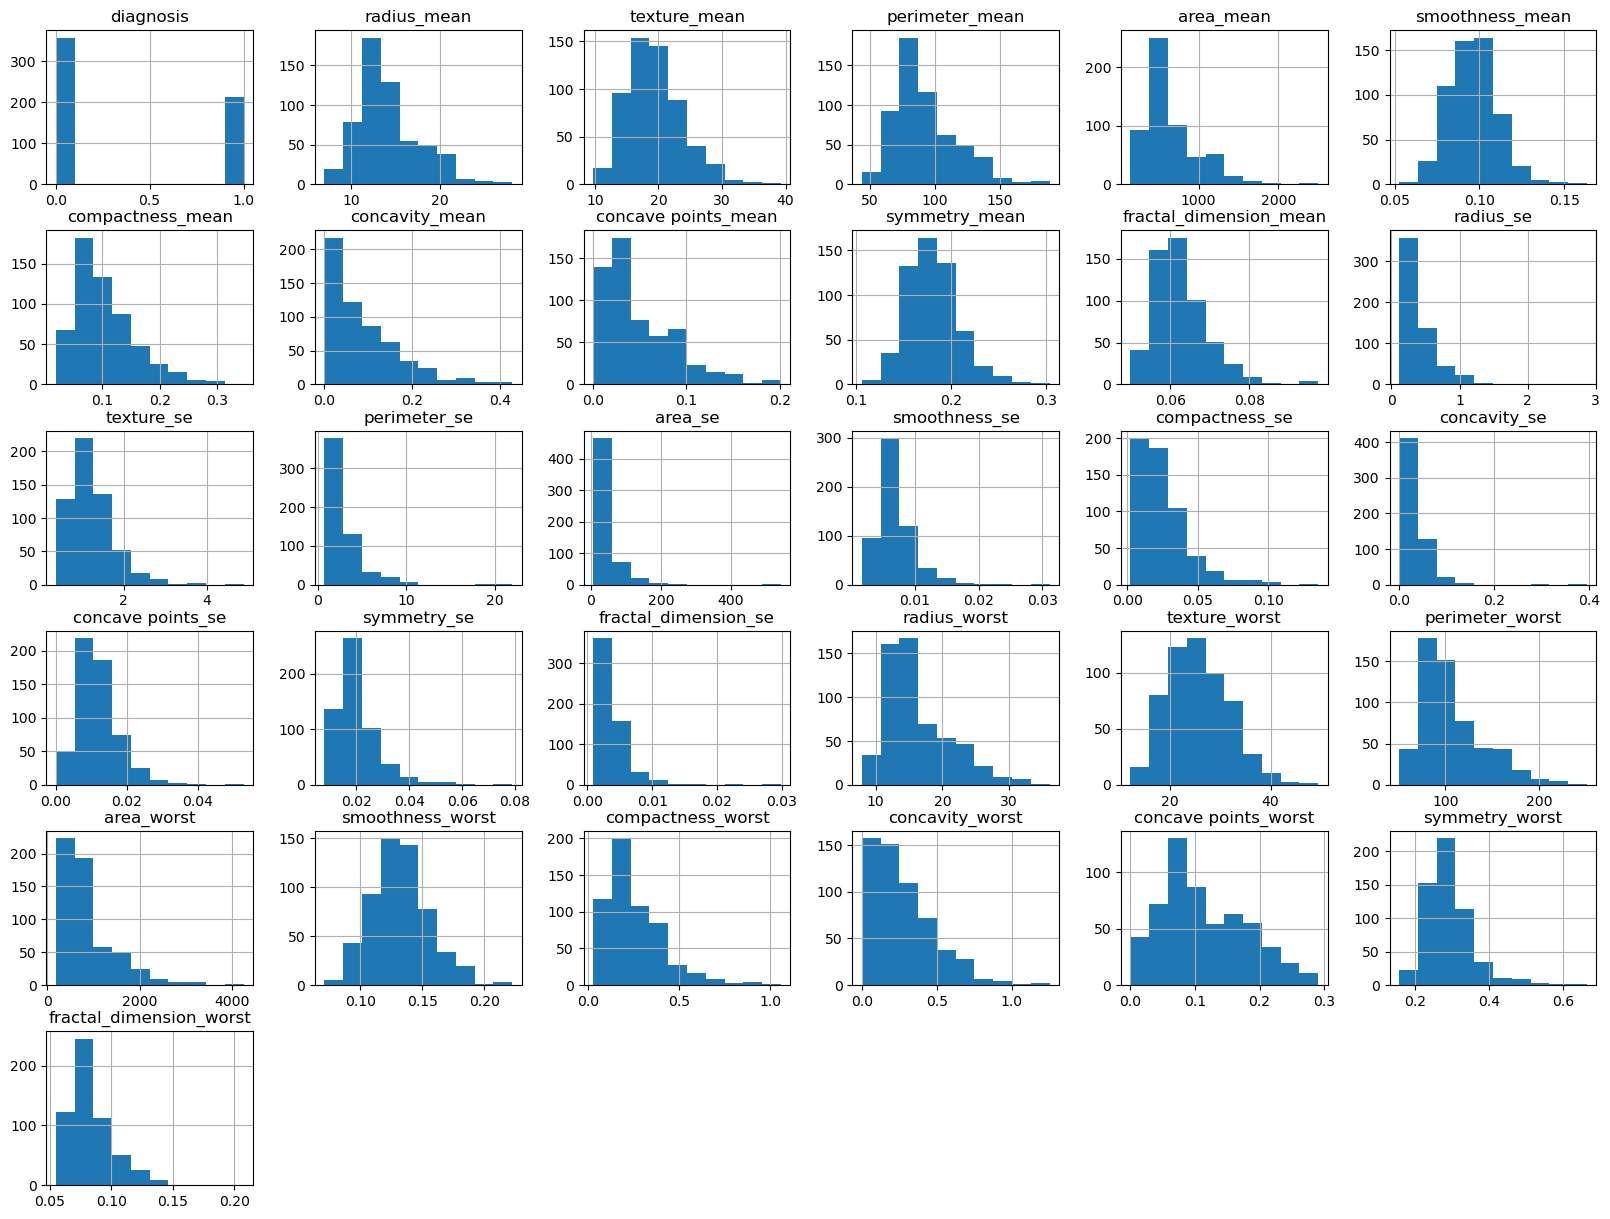

In [15]:
data.hist(figsize=(20,15))
plt.show()

In [16]:
data["diagnosis"].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

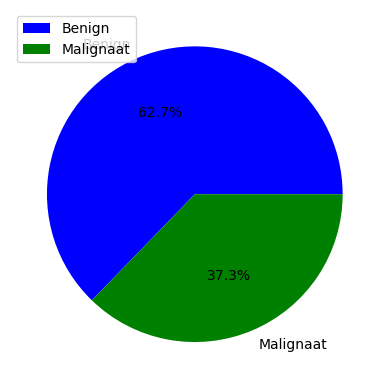

In [17]:
plt.pie(data["diagnosis"].value_counts(), labels= ['Benign', 'Malignaat'], colors = ["blue", "green"],autopct = '%1.1f%%')
plt.legend()
plt.show()

In [18]:
data.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


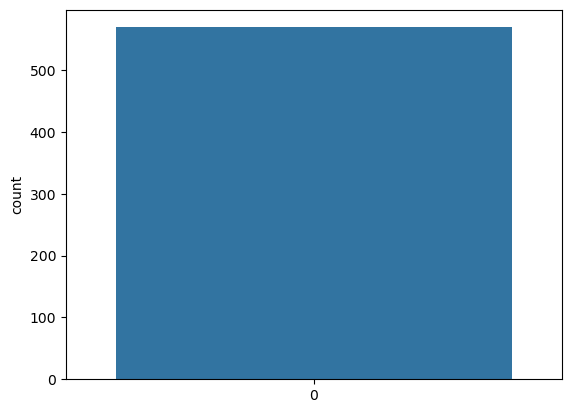

In [19]:
sns.countplot(data["diagnosis"])

plt.show()

<Axes: >

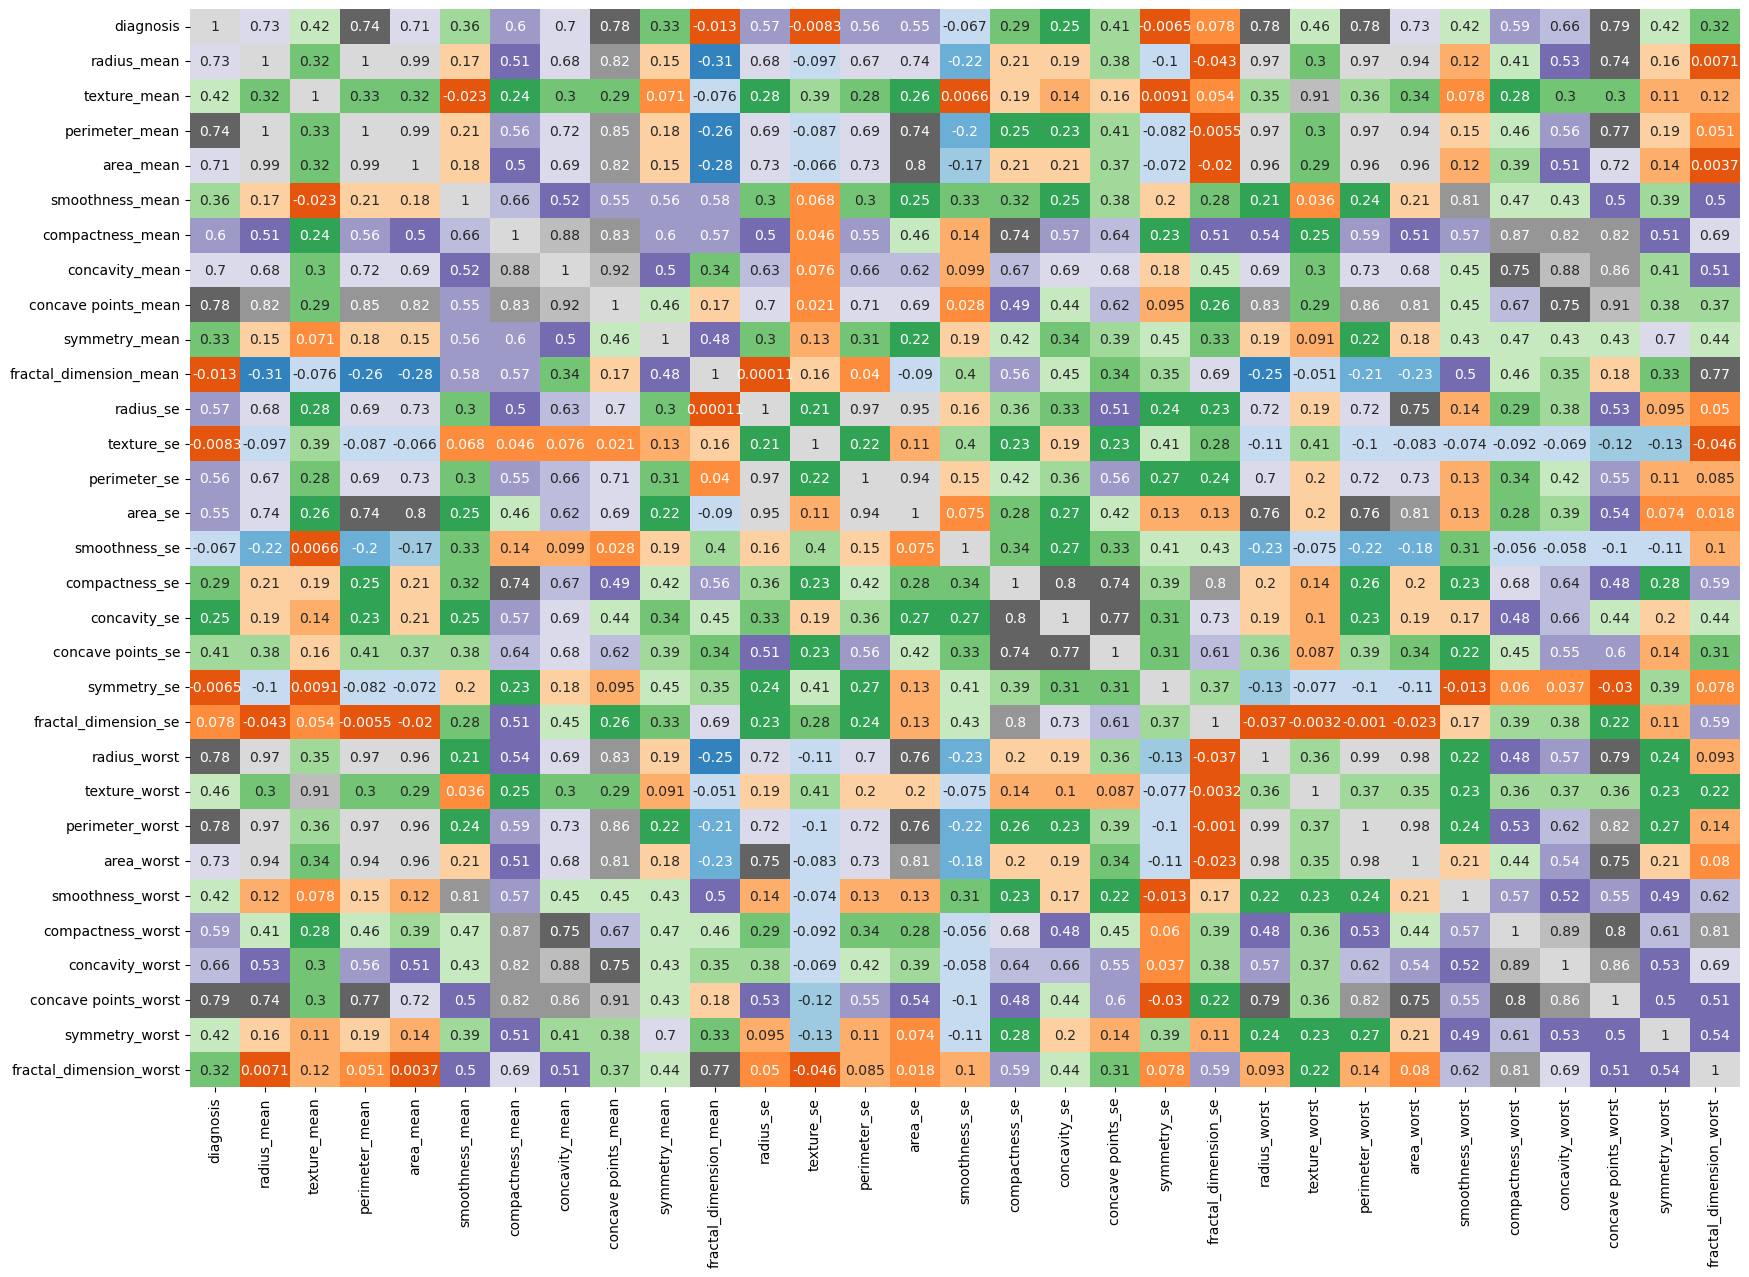

In [20]:
plt.figure(figsize = (20, 14))
sns.heatmap(data.corr(),annot= True, cbar = False, cmap = "tab20c")

In [21]:
X = data.drop(["diagnosis"], axis = 1)


In [22]:
Y = data["diagnosis"]

In [23]:
from sklearn.feature_selection import chi2, SelectKBest, f_classif
select1 = SelectKBest(f_classif, k=7)
select1.fit(X, Y)

SelectKBest(k=7)

In [24]:
X.columns[select1.get_support()]

Index(['radius_mean', 'perimeter_mean', 'concave points_mean', 'radius_worst',
       'perimeter_worst', 'area_worst', 'concave points_worst'],
      dtype='object')

In [25]:
X = X[X.columns[select1.get_support()]]

In [26]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [27]:
X = scaler.transform(X)

In [28]:
X

array([[ 1.09706398,  1.26993369,  2.53247522, ...,  2.30360062,
         2.00123749,  2.29607613],
       [ 1.82982061,  1.68595471,  0.54814416, ...,  1.53512599,
         1.89048899,  1.0870843 ],
       [ 1.57988811,  1.56650313,  2.03723076, ...,  1.34747521,
         1.45628455,  1.95500035],
       ...,
       [ 0.70228425,  0.67267578,  0.10577736, ...,  0.57900058,
         0.42790561,  0.41406869],
       [ 1.83834103,  1.98252415,  2.65886573, ...,  2.30360062,
         1.65317077,  2.28998549],
       [-1.80840125, -1.81438851, -1.26181958, ..., -1.43273495,
        -1.07581292, -1.74506282]])

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size =0.1, random_state = 45)

In [30]:
X.shape, x_train.shape

((569, 7), (512, 7))

In [31]:
Y.shape,y_train.shape

((569,), (512,))

In [32]:
y_train.head()

176    0
172    1
166    0
299    0
91     1
Name: diagnosis, dtype: int32

In [33]:
model = LinearRegression()

In [34]:
model.fit(x_train, y_train)

LinearRegression()

In [35]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.7215928632510812
0.6736087541587592


In [36]:
pre = model.predict(x_test)

In [37]:
score = r2_score(pre, y_test)

In [38]:
score

0.4286571786226693

In [39]:
model = SVC(gamma = "auto")
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test,predictions))

0.9473684210526315


In [40]:
cm = confusion_matrix(y_test, predictions)

In [41]:
cm

array([[41,  0],
       [ 3, 13]], dtype=int64)

<Axes: >

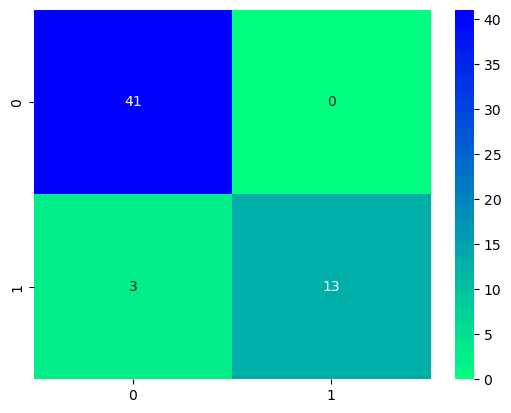

In [42]:
sns.heatmap(cm, annot= True, cmap= "winter_r")

In [43]:
print(precision_score(y_test, predictions),
      recall_score(y_test, predictions),
      f1_score(y_test, predictions))

1.0 0.8125 0.896551724137931


In [44]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        41
           1       1.00      0.81      0.90        16

    accuracy                           0.95        57
   macro avg       0.97      0.91      0.93        57
weighted avg       0.95      0.95      0.95        57



In [45]:
model = LogisticRegression()

In [46]:
model.fit(x_test,y_test)

LogisticRegression()

In [47]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.935546875
0.9473684210526315


In [48]:
pre = model.predict(x_test)

In [49]:
score = r2_score(pre, y_test)

In [50]:
score

0.701048951048951

In [51]:
cm = confusion_matrix(y_test, pre)

In [52]:
cm

array([[41,  0],
       [ 3, 13]], dtype=int64)

<Axes: >

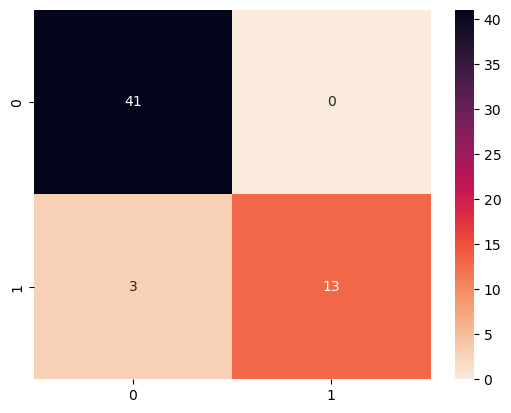

In [53]:
sns.heatmap(cm,annot=True, cmap="rocket_r")

In [54]:
print(classification_report(y_test, pre))
print(accuracy_score(y_test,pre))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        41
           1       1.00      0.81      0.90        16

    accuracy                           0.95        57
   macro avg       0.97      0.91      0.93        57
weighted avg       0.95      0.95      0.95        57

0.9473684210526315


In [55]:
model = GaussianNB()

In [56]:
model.fit(x_test, y_test)

GaussianNB()

In [57]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.927734375
0.9649122807017544


In [58]:
pre = model.predict(x_test)

In [59]:
score = r2_score(pre,  y_test)
score

0.8106312292358804

In [60]:
cm = confusion_matrix(y_test, pre)
cm

array([[41,  0],
       [ 2, 14]], dtype=int64)

<Axes: >

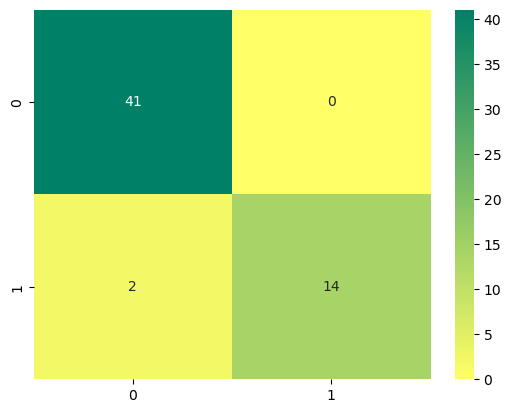

In [61]:
sns.heatmap(cm,annot=True, cmap="summer_r")

In [62]:
print(classification_report(pre,y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.88      1.00      0.93        14

    accuracy                           0.96        57
   macro avg       0.94      0.98      0.95        57
weighted avg       0.97      0.96      0.97        57



In [63]:
print(accuracy_score(pre,y_test))

0.9649122807017544


In [64]:
classifier = SVC(kernel= "linear")

In [65]:
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [66]:
pre= classifier.predict(x_train)

In [67]:
acc = accuracy_score(pre, y_train)

In [68]:
acc

0.970703125

In [70]:
new_data=(19.69,21.25,130.00,1203.0,0.10960,0.15990,0.197)
z= np.asarray(new_data).reshape(1, -1)

std_data = scaler.transform(z)
prediction = classifier.predict(std_data)

print(prediction)

if(prediction[0]== 0):
    print("You Have NO Cancer") 
    
else:
    print("You Have Cancer")

[1]
You Have Cancer


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can modify n_neighbors for different k values

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Plot confusion matrix
disp = confusion_matrix(y_pred,y_test)


plt.show()
disp

array([[38,  0],
       [ 5, 71]], dtype=int64)

<Axes: >

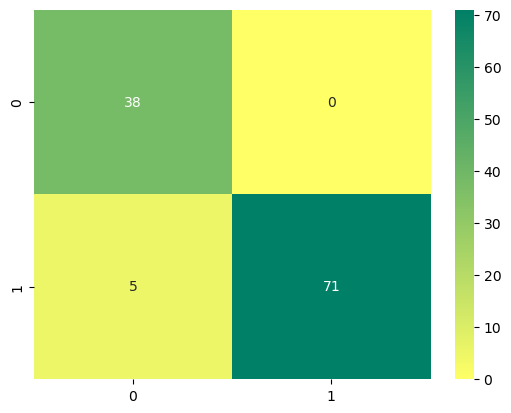

In [13]:
import seaborn as sns
sns.heatmap(disp,annot=True, cmap="summer_r")